In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data_train = pd.read_csv('/content/train.csv')
data_test = pd.read_csv('/content/test.csv')

In [ ]:

train_set = np.array(data_train).T
n,m = train_set.shape
print(n,m)
# no of training examples to use :
# m = 19999
np.random.shuffle(train_set.T) ## important so that the network isnt biased
Y_train = train_set[0,:m].reshape(1,m).astype(int)
# Y_train = train_set[0]
X_train = train_set[1:n,:m]
X_train = X_train / 255

print(Y_train.shape)
print(X_train.shape) #1 column is a single training example

test_set = np.array(data_test).T
p,q = test_set.shape
print(p,q)

# Y_test = test_set[0].reshape(1,q)
Y_test = test_set[0,:q].reshape(1,q).astype(int)
X_test = test_set[0:p,:q] / 255



785 42000
(1, 42000)
(784, 42000)
784 28000


In [ ]:
Y_test.shape
print(np.unique(Y_test))

[0]


[[6 8 6 ... 7 1 0]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


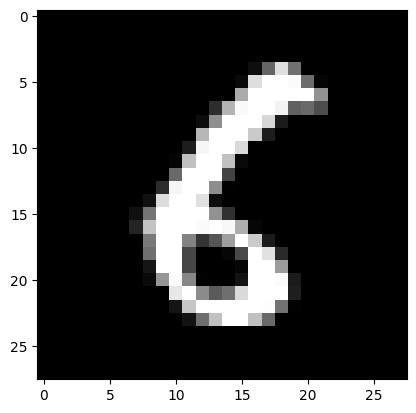

In [ ]:
print(Y_train)
print(X_train)
plt.show()
plt.imshow(X_train[:,0].reshape(28,28),cmap='gray')
plt.show()


In [ ]:
def init_params():
  W1 = np.random.randn(10,784) * 0.01
  b1 = np.zeros([10,1])
  W2 = np.random.randn(10,10) *0.01
  b2 = np.zeros([10,1])
  return W1, b1, W2, b2


def relu(Z):
  return np.maximum(0,Z)

def relu_d(Z):
  return Z > 0
def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A

def forward_propagation(W1, b1, W2, b2, X):
  Z1 = np.dot(W1,X) + b1 # (10 , m)
  A1 = relu(Z1)           #(10, m)
  Z2 = np.dot(W2,A1) + b2  # also (10,m)
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

def backward_propagation(Z1,A1,Z2,A2,W2,X,Y):
  #since dZ2 = A2 - Y but Y is a (1,19999)
  #so we subtract 1 from the specific index
  m = Y.shape[1]
  dZ2 = A2.copy()
  dZ2[Y,np.arange(Y.shape[1])] -= 1

  dW2 = (1 / m)* np.dot(dZ2,A1.T)
  db2 = (1 / m) * np.sum(dZ2)

  dZ1 = np.dot(W2.T, dZ2) * relu_d(Z1)
  dW1 = (1 / m) * np.dot(dZ1,X.T)
  db1 = (1 / m) * np.sum(dZ1)

  return dW1, db1, dW2, db2


In [ ]:
def prediction(A2):
  # print(A2.shape[1])
  return np.argmax(A2,0) ## returns the index for max along column

def accuracy(predictions, Y):
  return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, learning_rate):
  W1, b1, W2, b2 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = backward_propagation(Z1,A1,Z2,A2,W2,X,Y)

    #updating parameters
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2


    if i % 100 == 0:
      print("Iteration: ", i)
      predictions = prediction(A2)
      print("Accuracy: ", accuracy(predictions, Y))


  return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1000, 0.1)



Iteration:  0
Accuracy:  0.08721428571428572
Iteration:  100
Accuracy:  0.5381190476190476
Iteration:  200
Accuracy:  0.8115238095238095
Iteration:  300
Accuracy:  0.8603095238095239
Iteration:  400
Accuracy:  0.881547619047619
Iteration:  500
Accuracy:  0.8917142857142857
Iteration:  600
Accuracy:  0.8991428571428571
Iteration:  700
Accuracy:  0.9038809523809523
Iteration:  800
Accuracy:  0.9086904761904762
Iteration:  900
Accuracy:  0.9122857142857143


In [ ]:
## now the test accuracy
def predict(X, W1, b1, W2, b2):
  Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
  predictions = prediction(A2)
  return predictions
Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X_test)
predictions = prediction(A2)
print("Test Accuracy: ", accuracy(predictions, Y_test))


Test Accuracy:  0.09946428571428571


Prediction:  [0]
Label:  0


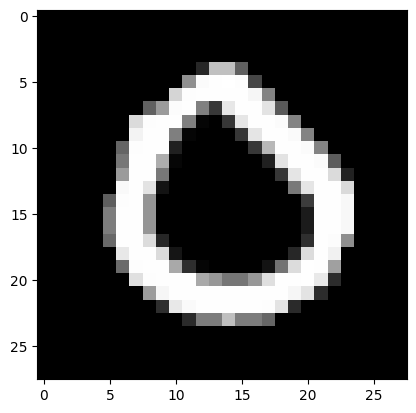

Prediction:  [5]
Label:  0


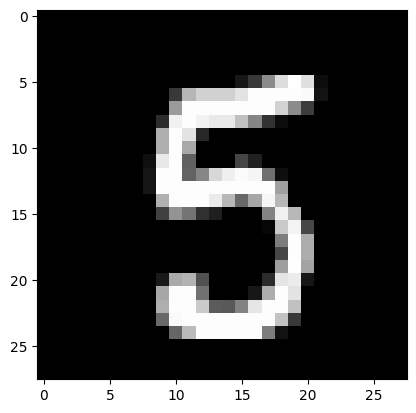

Prediction:  [9]
Label:  0


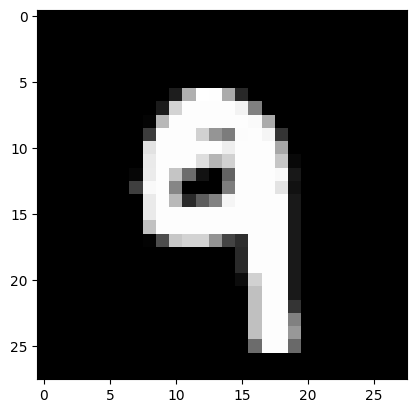

Prediction:  [4]
Label:  0


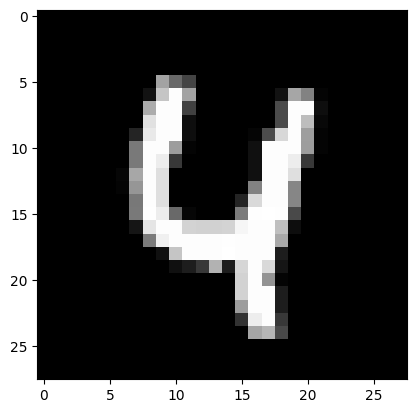

Prediction:  [6]
Label:  0


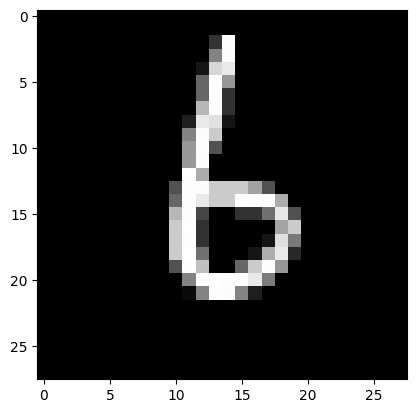

In [ ]:
# let's visualize
def test_predict(i, W1, b1, W2, b2):
  image = X_test[:,i].reshape(784,1)
  # print(image.shape)
  prediction = predict(image,W1, b1, W2, b2)
  # print(prediction.shape)
  label = Y_test[0,i]
  print("Prediction: ", prediction)
  print("Label: ", label)

  plt.gray()
  plt.imshow(image.reshape(28,28))
  plt.show()

test_predict(106,W1, b1, W2, b2)
test_predict(10,W1, b1, W2, b2)
test_predict(999,W1, b1, W2, b2)
test_predict(180,W1, b1, W2, b2)
test_predict(330,W1, b1, W2, b2)

